Bibliotecas e Importação das bases

In [2]:
import pandas as pd
import geopandas as gpd
import string
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import mapclassify
from shapely.geometry import Point
import missingno as msno
import difflib

In [ ]:
#importando as datas
datas=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\dates.csv")

#importando os metadados
metadados=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\metadata_latinamerica.csv")

#importando as dados
dados=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\tw_latinamerica.csv")

Tratando dimensão espacial

In [88]:
# Adicione uma nova linha com os nomes das colunas
new_header = pd.DataFrame([metadados.columns], columns=metadados.columns)

# Concatene a nova linha com o DataFrame original
df_with_header = pd.concat([new_header, metadados], ignore_index=True)

# renomeie o df substituindo os nomes errados com os valores corretos 
new_header = ['lat', 'long', 'x'] 
df_with_header.columns=new_header

In [91]:
#criando uma função para nomear individualmente cada linha do df 
labels=[]
def generated_labels(n):
    for i in range(n):
        label = ''
        while i >= 0:
            label = string.ascii_uppercase[i%26] + label 
            i = i // 26 - 1
        labels.append(label)
    return labels

numero_linhas = len(df_with_header) 
labels = generated_labels(numero_linhas)


In [93]:
#incluindo a nova linha com
df_with_header['labels'] = labels

In [95]:
nova_ordem = ['labels','lat','long','x']
df_with_header=df_with_header[nova_ordem]

In [119]:
df_with_header

,id,labels,lat,long,x
0,1,A,32.433,-99.85,545.3
1,2,B,24.583,-81.683,1.8
2,3,C,25.788,-80.317,1.4
3,4,D,25.483,-80.383,1.5
4,5,E,25.65,-80.433,2.0
...,...,...,...,...,...
401,402,OL,30.511,-99.766,533.1
402,403,OM,32.567,-117.117,7.0
403,404,ON,30.393,-84.353,20.7
404,405,OO,30.217,-81.883,25.3


In [118]:
#definindo um id para cada linha do df 
df_with_header['id'] = range(1, len(df_with_header) + 1)

#ajustando a ordem das colunas 
nova_ordem = ['id','labels','lat','long','x']
df_with_header=df_with_header[nova_ordem]

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_28596\3521835280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_header['id'] = range(1, len(df_with_header) + 1)


In [121]:
df_with_header['geometry'] = df_with_header.apply(lambda row: Point(row['long'], row['lat']), axis=1)

In [122]:
# Converta o DataFrame em GeoDataFrame
gdf = gpd.GeoDataFrame(df_with_header, geometry='geometry')
gdf.crs = 'EPSG:4326' 

In [182]:
# Plotar o GeoDataFrame
# gdf.plot(marker='o', color='red', markersize=1)

map = gdf.explore(
    tooltip=['labels'],  # Mostrar valor da coluna "Name" ao passar o mouse
    marker_kwds={'color': 'blue', 'fillOpacity': 0.6},
    zoom_start=6
)

map

Tratando dimensão temporal

In [148]:
#recortando apenas a coluna "label" da base de nomes e transformando ela em lista
df_with_header_label = df_with_header['labels']
lista_labels = df_with_header_label.values.tolist()

In [149]:
#criando uma versão alternativa de "dados"
dados_check = dados

In [150]:
# renomeie o df substituindo os nomes errados com os valores corretos 
dados_check.columns=lista_labels

In [151]:
dados_check

,A,B,C,D,E,F,G,H,I,J,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,6.41,21.43,20.86,20.51,20.93,19.61,18.90,17.80,16.88,18.66,...,8.02,6.02,18.30,14.22,8.60,NaN,NaN,NaN,19.00,18.03
33963,5.93,19.94,18.66,19.09,18.30,17.84,19.26,16.49,13.73,15.04,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,6.28,19.06,16.49,17.22,16.88,16.10,17.47,14.09,12.41,14.09,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,7.76,16.46,15.16,15.47,14.62,13.76,15.81,12.07,9.80,10.25,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27


In [172]:
# Duplicando datas para salvar backup
datas_check = datas

# Adicione uma nova linha com os nomes das colunas
trat_datas = pd.DataFrame([datas_check.columns], columns=datas_check.columns)

# Concatene a nova linha com o DataFrame original
trat_datas_head = pd.concat([trat_datas, datas_check], ignore_index=True)

# renomeie o df substituindo os nomes errados com os valores corretos 
new_header = ['year', 'month', 'day'] 
trat_datas_head.columns=new_header

In [174]:
dados_completo = pd.concat([trat_datas_head, dados_check], axis=1)

In [175]:
dados_completo

,year,month,day,A,B,C,D,E,F,G,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
0,1931,1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,2023,12,27,5.93,19.94,18.66,19.09,18.30,17.84,19.26,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,2023,12,28,6.28,19.06,16.49,17.22,16.88,16.10,17.47,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,2023,12,29,7.76,16.46,15.16,15.47,14.62,13.76,15.81,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27
33966,2023,12,30,8.31,17.05,13.99,14.33,14.74,14.52,14.81,...,9.76,6.75,12.43,19.27,14.46,NaN,NaN,NaN,9.99,8.33


<Axes: >

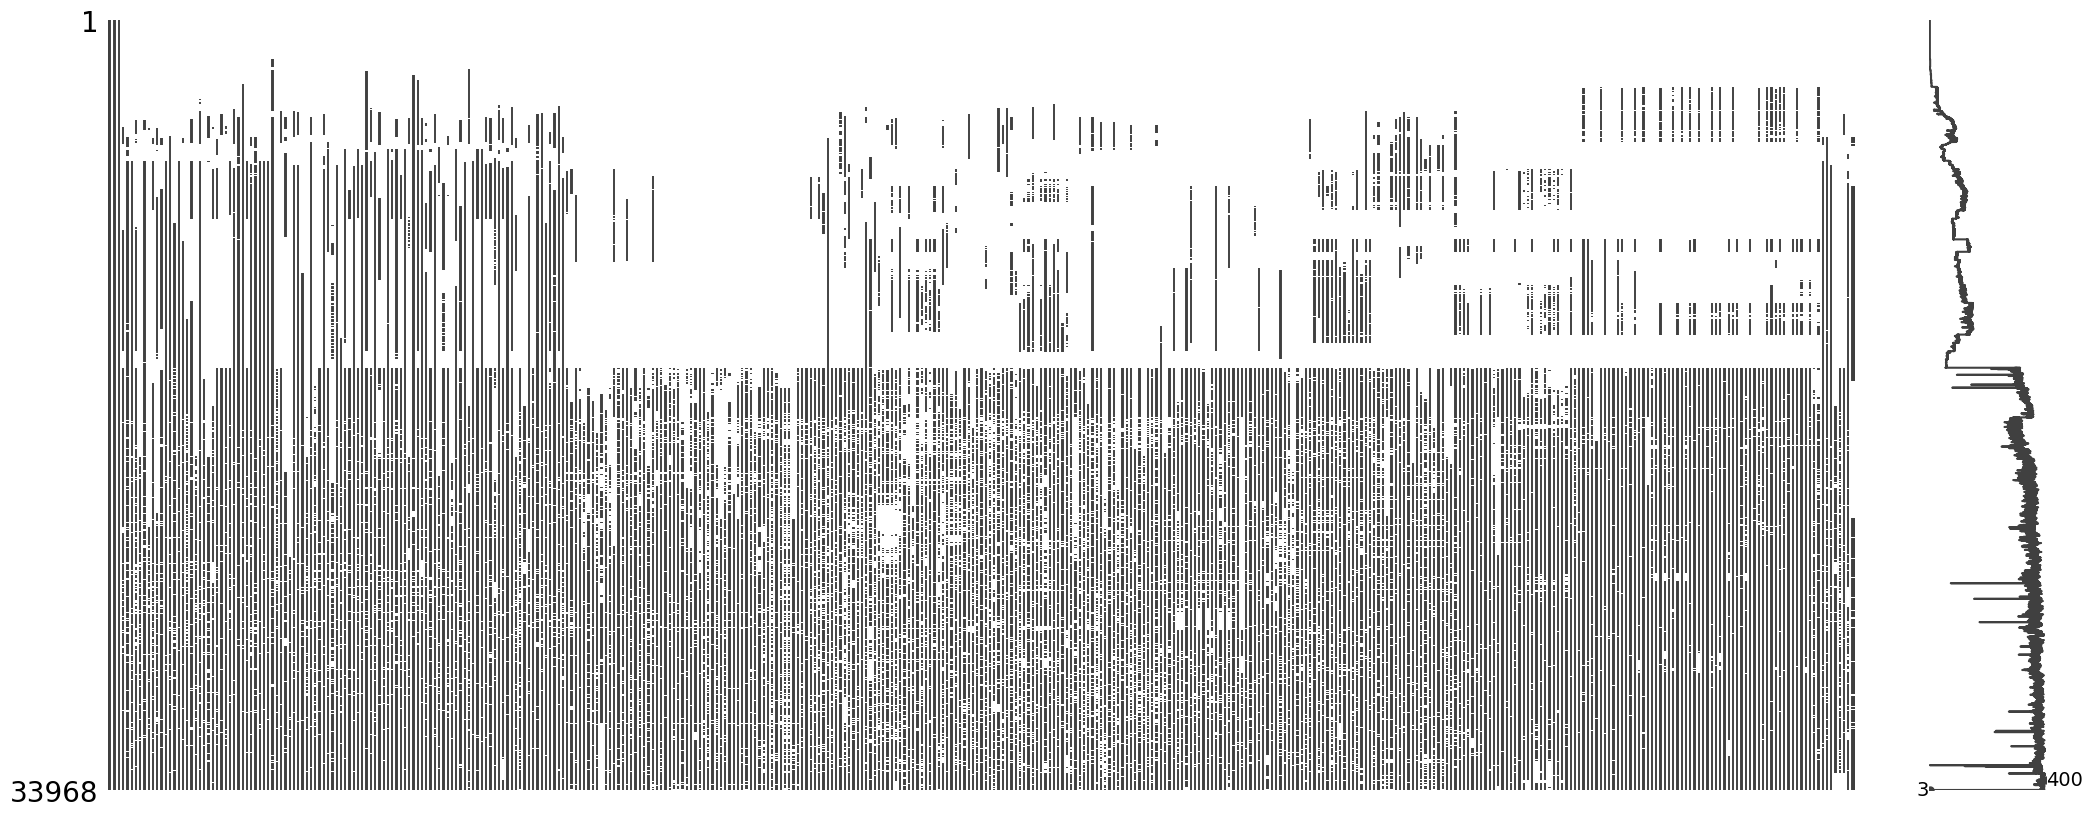

In [179]:
msno.matrix(dados_completo)

<Axes: >

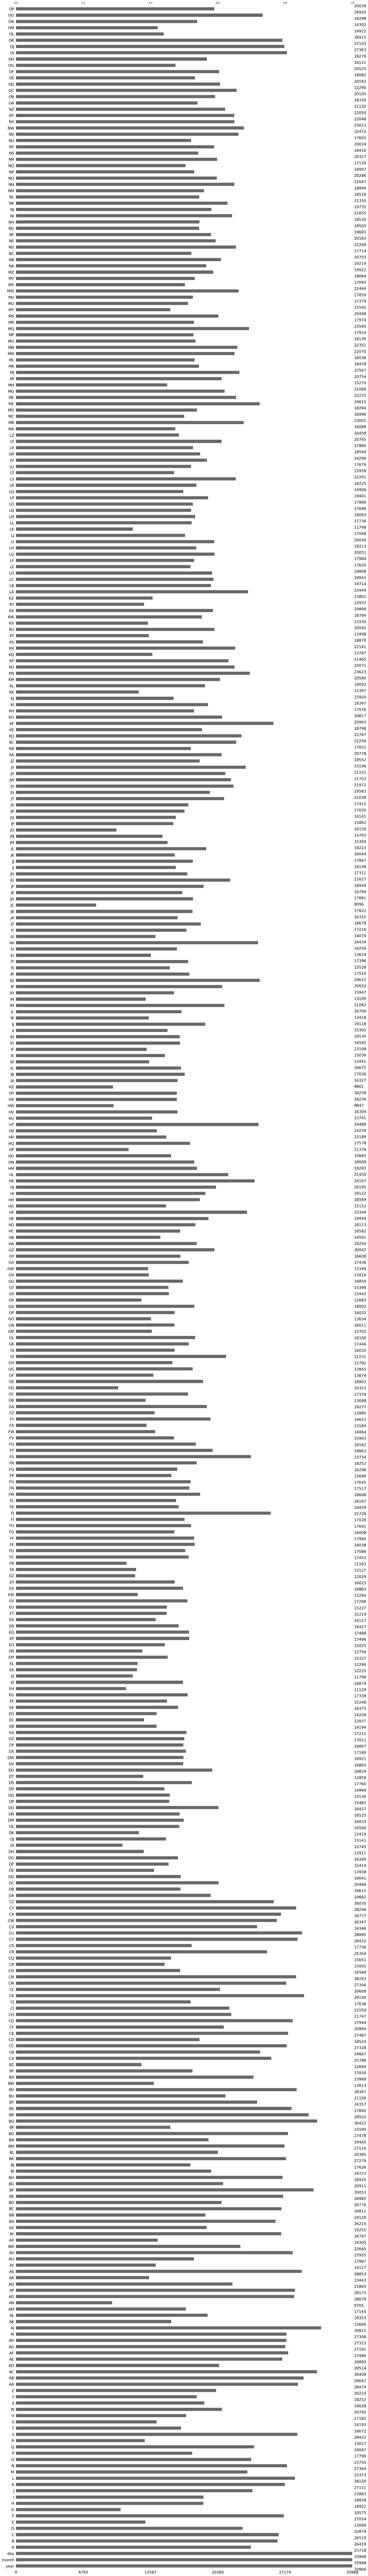

In [181]:
msno.bar(dados_completo)